## Data  개요
**적포도주 및 백포도주 샘플의 물리화학적 특성 및 품질 등급**
- UCI 머신러닝 저장소에 공개 : [dataset](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)
- 포르투갈 "Vinho Verde" 와인의 레드 및 화이트 변종 샘플에 대한 정보를 제공
- 각 와인 샘플은 와인 전문가에 의해 품질 평가를 받았고 화학적 테스트를 거쳤음
- 개인 정보 보호 및 물류 문제로 인해 포도 유형, 와인 브랜드, 와인 판매 가격 등에 대한 데이터가 없음

```
   Input variables (based on physicochemical tests):
   1 - fixed acidity (고정된 산도)
   2 - volatile acidity (휘발성 산도)
   3 - citric acid (구연산)
   4 - residual sugar (잔여 설탕)
   5 - chlorides (염화물)
   6 - free sulfur dioxide (유리 이산화황)
   7 - total sulfur dioxide (총 이산화황)
   8 - density (밀도)
   9 - pH (산도)
   10 - sulphates (황산염)
   11 - alcohol (알코올)
   
   Output variable (based on sensory data): 
   12 - quality (품질) (score between 0 and 10) 
```


## Step 1: 질문하기 (Ask questions)
데이터가 주어진 상태에서 질문을 할 수도 있고, 질문에 답할 수 있는 데이터를 수집할 수도 있다.

**질문 예시**
- 와인의 품질을 예측하는 데 가장 중요한 화학적 특성은 무엇일까?
- 어떤 유형(white, red)의 와인이 더 좋은 평가를 받을까?
- 알코올 도수가 높은 와인이 더 좋은 평가를 받을까?
- 더 달콤한 와인이 더 나은 평가를 받을까?
- 어느 정도의 산도가 와인 품질에 영향을 미칠까?

## Step 2: 데이터 랭글링 (Wrangle data)
- 데이터 랭글링 : 원자료(raw data)를 보다 쉽게 접근하고 분석할 수 있도록 데이터를 정리하고 통합하는 과정
(참고. 위키피디아)
- 세부적으로는 데이터의 수집(gather), 평가(assess), 정제(clean) 작업으로 나눌 수 있다.

### 2.1 수집(gather)

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
red_df = pd.read_table('./datasets/winequality-red.csv', sep=';')
white_df = pd.read_table('./datasets/winequality-white.csv', sep=';')

In [3]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### 2.2 평가(assess)

**샘플의 개수**, **컬럼의 개수**

In [5]:
red_df.shape, white_df.shape

((1599, 12), (4898, 12))

**누락 데이터 확인**

In [6]:
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
white_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


**중복 데이터 확인**

In [8]:
white_df.duplicated().sum()

937

In [9]:
red_df.duplicated().sum()

240

**quality 컬럼(특성)의 고유값과 개수**

In [10]:
white_df['quality'].unique(), white_df['quality'].nunique()

(array([6, 5, 7, 8, 4, 3, 9]), 7)

In [11]:
red_df['quality'].unique(), red_df['quality'].nunique()

(array([5, 6, 7, 4, 8, 3]), 6)

**통계 정보 확인**

In [12]:
white_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


### 2.3 정제(clean)

**중복데이터 삭제**

In [13]:
white_df.drop_duplicates(inplace=True)

In [14]:
red_df.drop_duplicates(inplace=True)

In [15]:
red_df.shape, white_df.shape

((1359, 12), (3961, 12))

**두 데이터 프레임 합치기**

In [16]:
red_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [17]:
white_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [18]:
red_df.columns == white_df.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [19]:
white_df['color'] = 'white'
red_df['color'] = 'red'

In [20]:
wine_df = pd.concat([red_df, white_df], axis=0)
wine_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [21]:
wine_df.shape

(5320, 13)

## Step 3: 데이터 탐색 (Exploratory Data Analysis)
데이터의 패턴을 찾고, 관계를 시각화 하는 작업 등으로 통해 데이터에 대한 직관을 극대화 한다.

### 3.1 새로 결합된 데이터 프레임으로 histogram 그리기
- fixed acidity, total sulfur dioxide, pH, alcohol 

In [22]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [24]:
hist_col = ['fixed acidity', 'total sulfur dioxide', 'pH', 'alcohol']

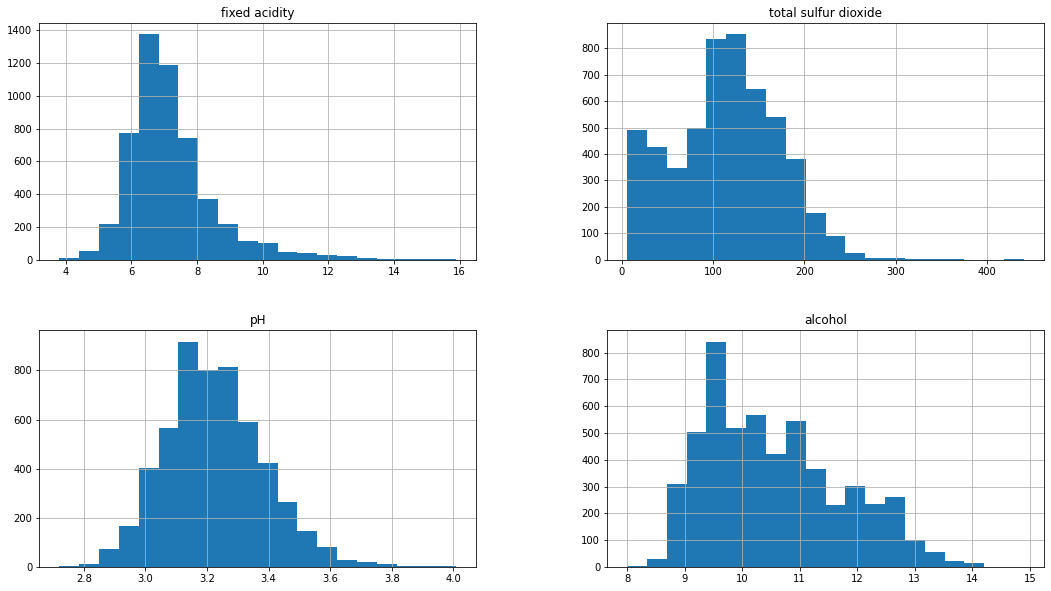

In [34]:
h = wine_df[hist_col].hist(bins=20, figsize=(18, 10))

In [35]:
wine_df[hist_col].describe()

,fixed acidity,total sulfur dioxide,pH,alcohol
count,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,114.109023,3.224664,10.549241
std,1.319671,56.774223,0.160379,1.185933
min,3.800000,6.000000,2.720000,8.000000
25%,6.400000,74.000000,3.110000,9.500000
50%,7.000000,116.000000,3.210000,10.400000
75%,7.700000,153.250000,3.330000,11.400000
max,15.900000,440.000000,4.010000,14.900000


- Question) 특성 중 오른쪽으로 꼬리가 긴 분포(right skewed distribution)는 어떤것인가?
- Answer) fixed Acidity, alcohol

### 3.2 새로 결합된 데이터 프레임으로 산점도 그리기
- quality와 아래의 특성들간의 상관관계 파악하기
- volatile acidity, residual sugar, pH, alcohol

In [40]:
scatter_col = ['volatile acidity', 'residual sugar', 'pH', 'alcohol', 'quality']

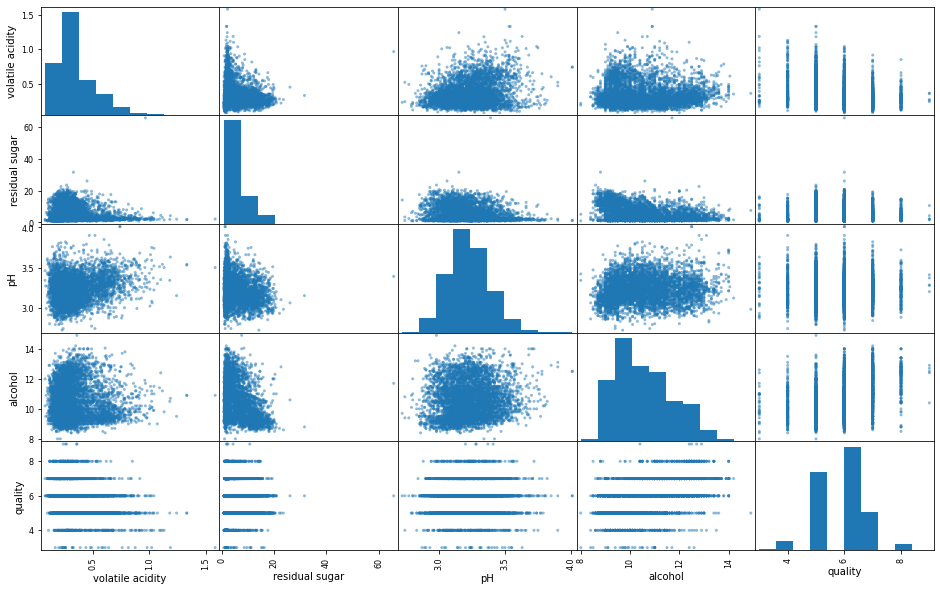

In [41]:
obj = pd.plotting.scatter_matrix(wine_df[scatter_col], figsize=(16, 10))

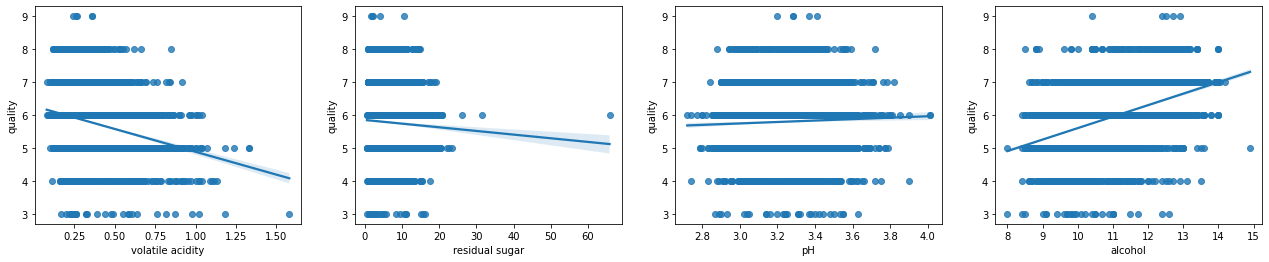

In [46]:
scatter_col = ['volatile acidity', 'residual sugar', 'pH', 'alcohol', 'quality']

figrue, axes = plt.subplots(nrows=1, ncols=len(scatter_col)-1, figsize=(22, 4))

for index, column in enumerate(scatter_col[:-1]):
    sns.regplot(data=wine_df[scatter_col], x=column, y='quality', ax=axes[index] )

In [47]:
wine_df[scatter_col].corr()

,volatile acidity,residual sugar,pH,alcohol,quality
volatile acidity,1.000000,-0.163696,0.246687,-0.065411,-0.265205
residual sugar,-0.163696,1.000000,-0.234522,-0.305242,-0.056830
pH,0.246687,-0.234522,1.000000,0.097314,0.039733
alcohol,-0.065411,-0.305242,0.097314,1.000000,0.469422
quality,-0.265205,-0.056830,0.039733,0.469422,1.000000


- Question) 품질에 긍정적인 영향을 미칠 가능성이 높은 특성은 어떤 것인가?
- Answer) alcohol

## Step 4: 결론 도출 또는 예측 (Draw conclusions or make predictions)

###  4.1 어떤 유형(white, red)의 와인이 더 좋은 평가를 받을까?

In [48]:
wine_df['color'].value_counts()

white    3961
red      1359
Name: color, dtype: int64

In [49]:
wine_df.groupby('color').mean()['quality']

color
red      5.623252
white    5.854835
Name: quality, dtype: float64

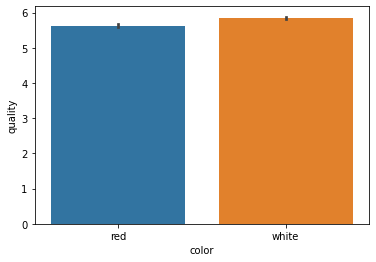

In [50]:
sns.barplot(data=wine_df, x='color', y='quality')

- **분석결과** : white wine의 quality 평균값이 더 높다.

###  4.2 어느 정도의 산도가 와인 품질에 영향을 미칠까?
- 산도를 4등분하여 (low, medium, medium_high, high ) 어느 단계의 quality의 평균값이 높은지 확인하기

In [51]:
wine_df['pH'].describe()

count    5320.000000
mean        3.224664
std         0.160379
min         2.720000
25%         3.110000
50%         3.210000
75%         3.330000
max         4.010000
Name: pH, dtype: float64

In [52]:
bins = [2.72, 3.11, 3.21, 3.33, 4.01]
labels = ['high', 'medium_high', 'medium', 'low']
wine_df['acidity_levels'] = pd.cut(wine_df['pH'], bins=bins, labels =labels)

In [53]:
wine_df['acidity_levels'].value_counts()

medium         1391
high           1331
medium_high    1330
low            1267
Name: acidity_levels, dtype: int64

In [ ]:
# 또는
# wine_df['acidity_levels2'] = pd.qcut(wine_df['pH'], 4, labels =labels)
# wine_df['acidity_levels2'].value_counts()

In [54]:
wine_df.groupby('acidity_levels').mean()['quality']

acidity_levels
high           5.728024
medium_high    5.766917
medium         5.852624
low            5.834254
Name: quality, dtype: float64

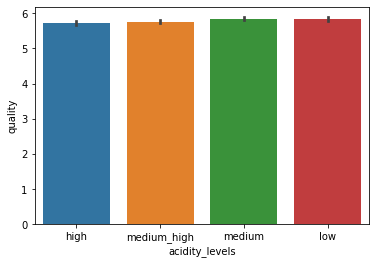

In [55]:
sns.barplot(data=wine_df, x='acidity_levels', y='quality')

- **분석결과** : medium 단계(산도를 4등분했을 때 low/medium/medium_high/high)의 qulaity 평균값이 높다.

###  4.3 더 달콤한 와인이 더 나은 평가를 받을까?


In [56]:
median_sugar = wine_df['residual sugar'].median()
low_sugar = wine_df[wine_df['residual sugar'] < median_sugar]
high_sugar = wine_df[wine_df['residual sugar'] >= median_sugar]

In [57]:
wine_df.shape[0] == (low_sugar.shape[0] + high_sugar.shape[0])

True

In [58]:
low_sugar['quality'].mean()

5.78316032295271

In [59]:
high_sugar['quality'].mean()

5.807649871276205

In [60]:
wine_df["sugar_level"] = pd.qcut(wine_df['residual sugar'], 2, labels=['low_sugar', 'high_sugar'])

In [61]:
wine_df.groupby("sugar_level").mean()['quality']

sugar_level
low_sugar     5.789513
high_sugar    5.801887
Name: quality, dtype: float64

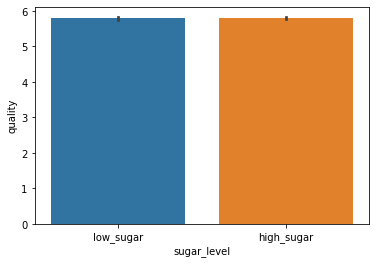

In [62]:
sns.barplot(data=wine_df, x='sugar_level', y='quality')

**분석 결과** : 더 달콤한 와인(중앙값 기준으로 low/high)의 Qulaity의 평균값이 더 높다.

###  4.4  알코올 도수가 높은 와인이 더 좋은 평가를 받을까?

In [63]:
median_alcohol = wine_df['alcohol'].median()
low_alcohol = wine_df[wine_df['alcohol'] < median_alcohol]
high_alcohol = wine_df[wine_df['alcohol'] >= median_alcohol]

In [64]:
low_alcohol['quality'].mean()

5.439202148062908

In [65]:
high_alcohol['quality'].mean()

6.138223368964246

In [66]:
wine_df["alcohol_level"] = pd.qcut(wine_df['alcohol'], 2, labels=['low_alcohol', 'high_alcohol'])

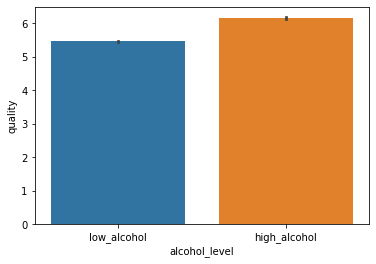

In [67]:
sns.barplot(data=wine_df, x='alcohol_level', y='quality')

**분석 결과** : 알콜 도수가 높은 와인의 Qulaity의 평균값이 더 높다.

## Step 5: 결과 공유 (Communicate the results)
보고서, 이메일, 블로그 등 다양한 방법을 통해 발견한 통찰들을 공유할 수 있다.